# PIMA Dibates Dataset Prediction:-

# Importing Libraies:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [97]:
data = pd.read_csv('C:\\Users\\MI Laptop\\Downloads\\diabetes.csv')
print(data.shape)

(768, 10)


In [98]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [99]:
print('no of rows in dataset:',data.shape[0])
print('no of columns in dataset:',data.shape[1])
print("no of features in dataset:",data.columns.tolist())

no of rows in dataset: 768
no of columns in dataset: 10
no of features in dataset: ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'skin', 'diabetes']


# Checking The Null Values

In [69]:
data.isnull().values.any()

False

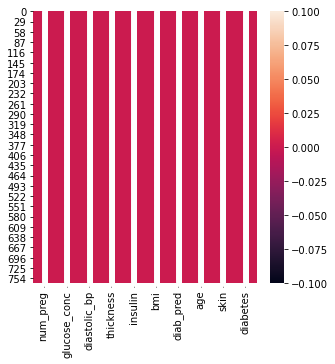

In [100]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull(),annot=True)

# Feature Engineering

In [101]:
#Converting the target class into binary Format:
diabetes_map = {True: 1,False: 0}

In [102]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [103]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [104]:
data.groupby("diabetes").size()

diabetes
0    500
1    268
dtype: int64

In [105]:
#Replacing Zeros Values in each record:
data.loc[:, 'glucose_conc'].replace([0], [data['glucose_conc'].mean()], inplace=True)
data.loc[:, 'num_preg'].replace([0], [data['num_preg'].mean()], inplace=True)
data.loc[:, 'diastolic_bp'].replace([0], [data['diastolic_bp'].mean()], inplace=True)
data.loc[:, 'thickness'].replace([0], [data['thickness'].mean()], inplace=True)
data.loc[:, 'insulin'].replace([0], [data['insulin'].mean()], inplace=True)
data.loc[:, 'diab_pred'].replace([0], [data['diab_pred'].mean()], inplace=True)
data.loc[:, 'age'].replace([0], [data['age'].mean()], inplace=True)
data.loc[:, 'skin'].replace([0], [data['skin'].mean()], inplace=True)

# Exploratory Data Analysis:

1.Multivariate Analysis.

2.Univariate Analysis

3.Bivariate Analysis


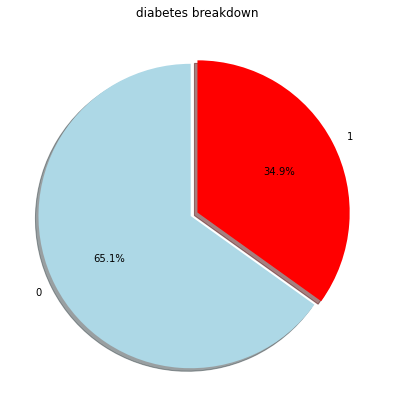

In [76]:
# univariate Analysis: checking diabetes breakdown:
from pylab import rcParams
labels = data['diabetes'].value_counts(sort = True).index
sizes = data['diabetes'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('diabetes breakdown')
plt.show()

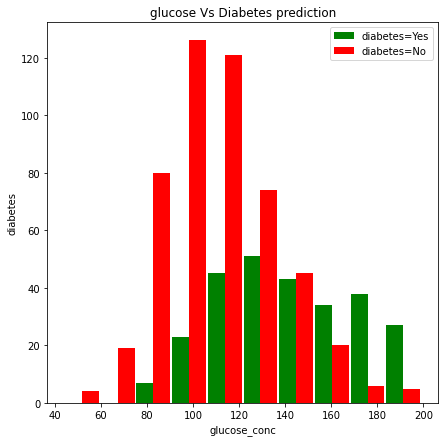

In [77]:
#Bivariate Analysis Glusose VS Diabetes Prediction
glucose_dibetes_yes = data.loc[data['diabetes'] == 1].glucose_conc
glucose_dibetes_No = data.loc[data['diabetes'] == 0].glucose_conc
plt.xlabel("glucose_conc")
plt.ylabel("diabetes")
plt.title("glucose Vs Diabetes prediction")
plt.hist([glucose_dibetes_yes, glucose_dibetes_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

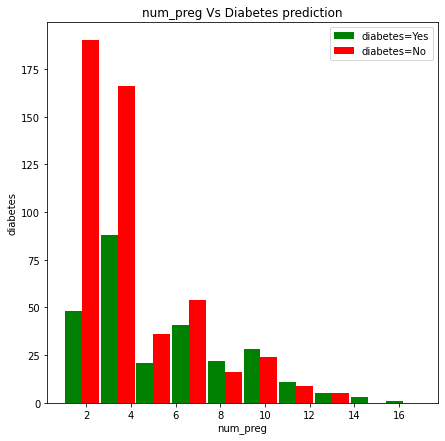

In [78]:
# Bivariate Analysis num_preg Vs Diabetes prediction
num_preg_yes = data.loc[data['diabetes'] == 1].num_preg
num_preg_No = data.loc[data['diabetes'] == 0].num_preg
plt.xlabel("num_preg")
plt.ylabel("diabetes")
plt.title("num_preg Vs Diabetes prediction")
plt.hist([num_preg_yes, num_preg_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

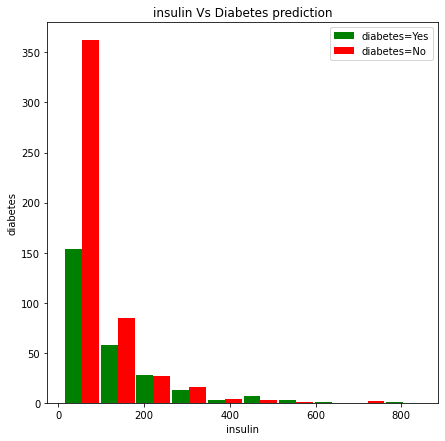

In [79]:
# Bivariate Analysis insulin Vs Diabetes prediction
insulin_yes = data.loc[data['diabetes'] == 1].insulin
insulin_No = data.loc[data['diabetes'] == 0].insulin
plt.xlabel("insulin")
plt.ylabel("diabetes")
plt.title("insulin Vs Diabetes prediction")
plt.hist([insulin_yes, insulin_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

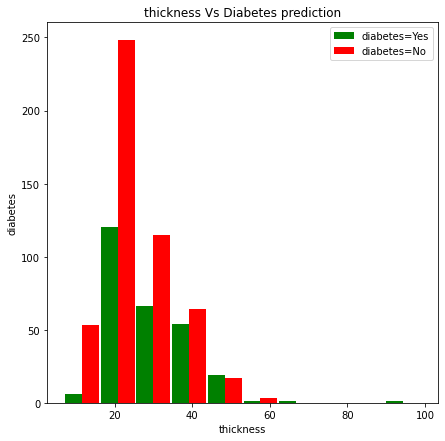

In [80]:
# Bivariate Analysis thickness Vs Diabetes prediction
thickness_yes = data.loc[data['diabetes'] == 1].thickness
thickness_No = data.loc[data['diabetes'] == 0].thickness
plt.xlabel("thickness")
plt.ylabel("diabetes")
plt.title("thickness Vs Diabetes prediction")
plt.hist([thickness_yes, thickness_No], rwidth=0.95, color=['green','red'],label=['diabetes=Yes','diabetes=No'])
plt.legend()

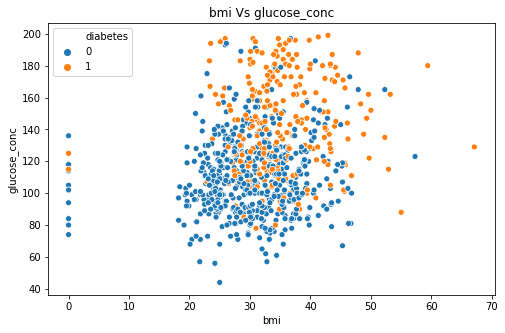

In [81]:
# Multivarite Analysis Checking impact of bmi Vs glucose_conc on diabates prediction
plt.figure(figsize=(8,5))
plt.xlabel("bmi")
plt.ylabel("glucose_conc")
plt.title("bmi Vs glucose_conc")
sns.scatterplot(x='bmi',y='glucose_conc',hue='diabetes',data=data)

# Checking Outliers in Dataset:

In [82]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,1.048295,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.379471,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.275800,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.809136,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [83]:
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

num_preg           AxesSubplot(0.125,0.536818;0.133621x0.343182)
glucose_conc    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
diastolic_bp     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
thickness       AxesSubplot(0.606034,0.536818;0.133621x0.343182)
insulin         AxesSubplot(0.766379,0.536818;0.133621x0.343182)
bmi                   AxesSubplot(0.125,0.125;0.133621x0.343182)
diab_pred          AxesSubplot(0.285345,0.125;0.133621x0.343182)
age                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
skin               AxesSubplot(0.606034,0.125;0.133621x0.343182)
diabetes           AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

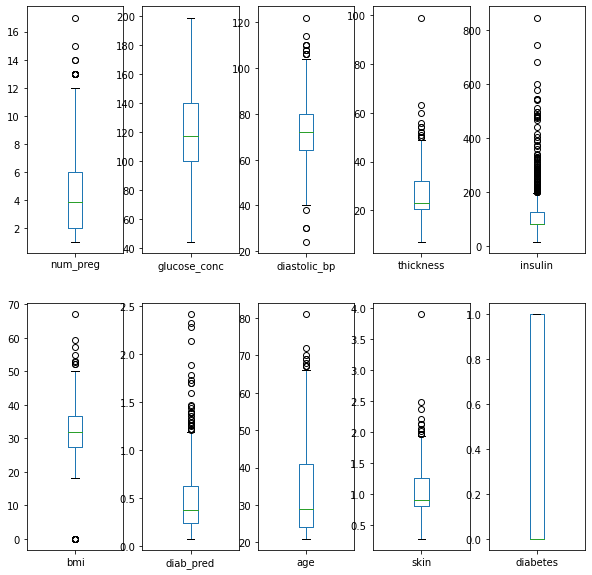

In [84]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
# Checking for Outliers by using boxplot:.
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

In [106]:
# Removing the outliers by using Zscore Method:
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(data))
print("Before removal of outliers:",data.shape)
data_final = data.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",data_final.shape)

Before removal of outliers: (768, 10)
After removal of outliers: (709, 10)


# Checking wheather all the variables following normal Distribution:

In [107]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
print(data.skew())
print("Skewed features: ",len(data.skew().loc[abs(data.skew())>0.55]))

num_preg        1.041865
glucose_conc    0.533225
diastolic_bp    0.173050
thickness       1.226670
insulin         3.291825
bmi            -0.428982
diab_pred       1.919911
age             1.129597
skin            1.226670
diabetes        0.635017
dtype: float64
Skewed features:  7


In [50]:
import scipy.stats as stat
import pylab

In [51]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

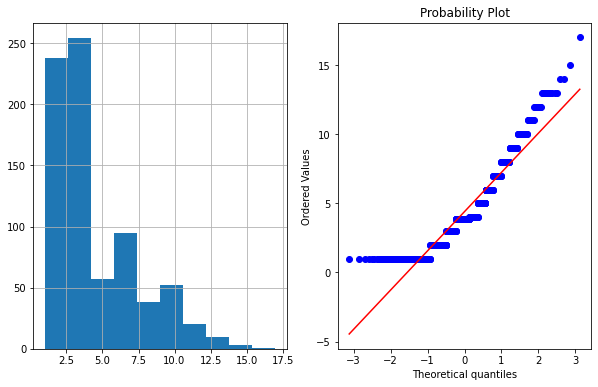

In [52]:
#We can check for skewness by using Distrution plot:
plot_data(data,'num_preg')

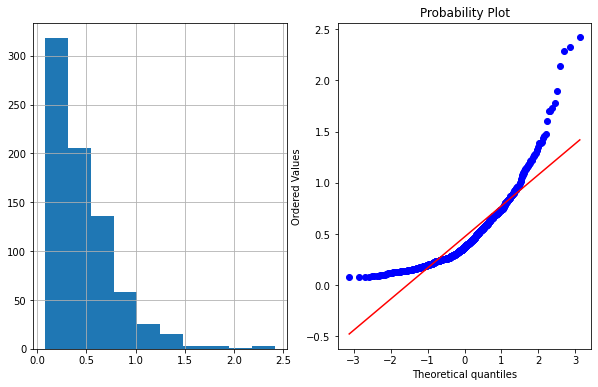

In [54]:
#We can check for skewness by using Distrution plot:
plot_data(data,'diab_pred')

In [108]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
for col in df.columns:
    if col!= 'diabetes':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

# Selecting Dependant and Independant Variable:

In [109]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']
print(X.shape)
print(y.shape)

(768, 9)
(768,)


In [110]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

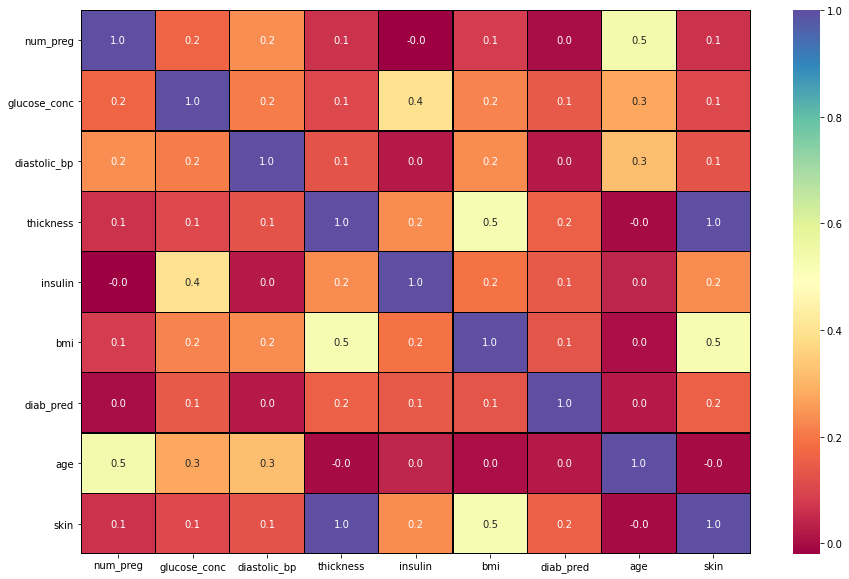

In [112]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

Text(0.5, 1.0, 'corelation with target variable')

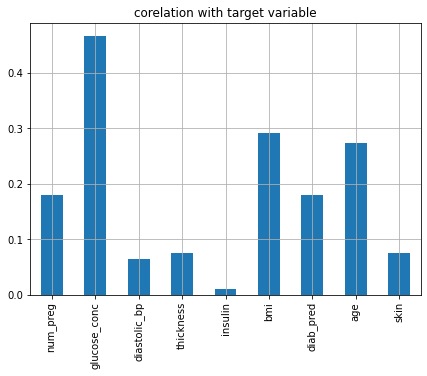

In [120]:
#Corelation looks Fine no presence of multicolinearty
#corelation with target column:
plt.figure(figsize=(7,5))
df.drop('diabetes',axis=1).corrwith(df['diabetes']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [121]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Implementing Algorithim For Prediction

In [122]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy Score of model is:",model.score(X_test,y_test))
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [123]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy Score of model is: 0.7727272727272727
Cross validation is 77.34827264239028


In [124]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.7207792207792207
Cross validation is 71.7587641117053


In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy Score of model is: 0.7402597402597403
Cross validation is 76.30846277905101


In [126]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.7402597402597403
Cross validation is 75.26695526695526


In [131]:
#As Logistic Regression is giving Max Accuracy Lets Implement it and check the acuuracy:but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. 
#Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [132]:
#Implementing Algorithim
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [143]:
#Lets perform Hyperparametre Tuning:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': np.logspace(-3, 3, 10),'penalty':['l2','l1']}  
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),verbose=0,n_jobs=-1,scoring='f1')

In [144]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [145]:
#Getting best Score:
print(grid_search.best_score_)

0.6508963375400851


accuracy_score: 0.7662337662337663
[[83 16]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



Text(0.5, 48.29999999999998, 'Predicted label')

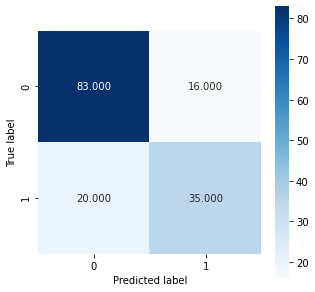

In [147]:
model = LogisticRegression(C=10.0,penalty='l2')
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [150]:
#Checking the mean scores
scores = cross_val_score(model,X,y,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)

In [151]:
#Final mean score as the final measure of model performance.
scores.mean()

0.6183762267063558

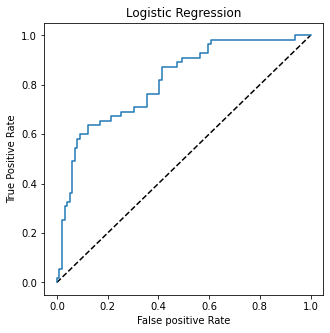

0.7373737373737373


In [154]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='Logistic Regression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [155]:
#Saving the best Model:
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)